In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('pulldown_HG03464_PIK3R5_proteinGroups.tsv', sep = '\t')
data = data[data['Potential contaminant'] != '+']
data = data.dropna(subset = ['Gene names'])

In [4]:
data.columns

Index(['Protein IDs', 'Majority protein IDs', 'Peptide counts (all)',
       'Peptide counts (razor+unique)', 'Peptide counts (unique)',
       'Protein names', 'Gene names', 'Fasta headers', 'Number of proteins',
       'Peptides', 'Razor + unique peptides', 'Unique peptides', 'Peptides F',
       'Peptides R', 'Razor + unique peptides F', 'Razor + unique peptides R',
       'Unique peptides F', 'Unique peptides R', 'Sequence coverage [%]',
       'Unique + razor sequence coverage [%]', 'Unique sequence coverage [%]',
       'Mol. weight [kDa]', 'Sequence length', 'Sequence lengths', 'Q-value',
       'Score', 'Identification type F', 'Identification type R',
       'Ratio H/L F', 'Ratio H/L R', 'Ratio H/L normalized F',
       'Ratio H/L normalized R', 'Ratio H/L variability [%] F',
       'Ratio H/L variability [%] R', 'Ratio H/L count F', 'Ratio H/L count R',
       'Ratio H/L iso-count F', 'Ratio H/L iso-count R', 'Ratio H/L type F',
       'Ratio H/L type R', 'Sequence coverage F

In [5]:
iqr_x = np.nanpercentile(np.log2(data['Ratio H/L normalized F']), 75) - np.nanpercentile(np.log2(data['Ratio H/L normalized F']), 25)
iqr_y = np.nanpercentile(-np.log2(data['Ratio H/L normalized R']), 75) - np.nanpercentile(-np.log2(data['Ratio H/L normalized R']), 25)
cutoff_x_pos = np.nanpercentile(np.log2(data['Ratio H/L normalized F']), 75) + 1.5*iqr_x
cutoff_x_neg = np.nanpercentile(np.log2(data['Ratio H/L normalized F']), 25) - 1.5*iqr_x
cutoff_y_pos = np.nanpercentile(-np.log2(data['Ratio H/L normalized R']), 75) + 1.5*iqr_y
cutoff_y_neg = np.nanpercentile(-np.log2(data['Ratio H/L normalized R']), 25) - 1.5*iqr_y

print(cutoff_x_pos, cutoff_x_neg, cutoff_y_pos, cutoff_y_neg)
hits_pos = data[(np.log2(data['Ratio H/L normalized F']) > cutoff_x_pos) & (-np.log2(data['Ratio H/L normalized R']) > cutoff_y_pos)]
hits_neg = data[(np.log2(data['Ratio H/L normalized F']) < cutoff_x_neg) & (-np.log2(data['Ratio H/L normalized R']) < cutoff_y_neg)]

1.0250386485150458 -0.9748077202373764 0.6640444285594556 -0.8367203679626898


In [6]:
print(hits_pos['Gene names'].values), 
print(hits_neg['Gene names'].values)

['RUNX3' 'CBFB' 'KPRP' 'ZFP91' 'IKZF2' 'IKZF3' 'ZNF281']
['POU2F2' 'RPA2' 'RPA1' 'HDAC1' 'E4F1' 'MIDEAS' 'HDAC2' 'INO80B' 'DNTTIP1']


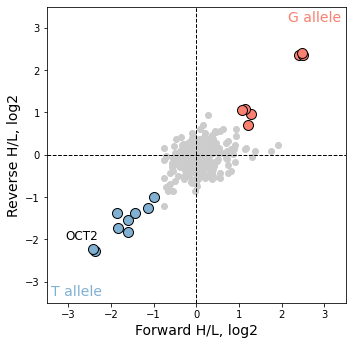

In [9]:
plt.figure(figsize = (5, 4.9))
#plt.title('rs545467951 T>G', fontsize = 16)
plt.scatter(np.log2(data['Ratio H/L normalized F']), 
            -np.log2(data['Ratio H/L normalized R']), color = '#CCCCCC', edgecolor = '#CCCCCC')
plt.scatter(np.log2(hits_pos[::-1]['Ratio H/L normalized F']), 
            -np.log2(hits_pos[::-1]['Ratio H/L normalized R']), color = '#FA8071', edgecolor = 'k', s = 100)
plt.scatter(np.log2(hits_neg[::-1]['Ratio H/L normalized F']), 
            -np.log2(hits_neg[::-1]['Ratio H/L normalized R']), color = '#80B1D3', edgecolor = 'k', s = 100)
plt.text(x = -2.3, y = -2, s = 'OCT2', ha = 'right', fontsize = 12)
plt.xlim((-3.5, 3.5))
plt.ylim((-3.5, 3.5))
plt.axvline(0, lw = 1, ls = '--', color = 'k')
plt.axhline(0, lw = 1, ls = '--', color = 'k')
plt.xlabel('Forward H/L, log2', fontsize = 14)
plt.ylabel('Reverse H/L, log2', fontsize = 14)
plt.text(s = 'G allele', x = 3.4, y = 3.4, va = 'top', ha = 'right', fontsize = 14, color = '#FA8071')
plt.text(s = 'T allele', x = -3.4, y = -3.4, va = 'bottom', ha = 'left', fontsize = 14, color = '#80B1D3')
plt.tight_layout()
plt.savefig('/DATA/users/m.magnitov/hap_phen/figures/validation_pull_down_results_PIK3R5.pdf', bbox_inches = 'tight')
plt.show()